In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
from quad import Quads #custom class for quad data
import tdt

In [11]:
basedir = '/home/danhan/code/data/quad_data'
animal = 'Diego'
date = '251118'
data_dir = f'{basedir}/{animal}/{date}'

In [12]:
bhv_list = [f'{data_dir}/{f}' for f in os.listdir(data_dir) if f.endswith('mat')]

In [13]:
if animal == 'Diego':
    subject = 'S1'
elif animal == 'Pancho':
    subject = 'S2'


with open(f'{basedir}/{animal}/conditions_quadrilaterals_{subject}.txt', 'r') as f:
    conditions = pd.read_csv(f, delimiter = '\t')

In [14]:
bhv_list[0]

'/home/danhan/code/data/quad_data/Diego/251118/251118_154252_finalquads3_Diego_2.mat'

In [15]:
neural_dir = f'/home/danhan/freiwaldDrive/ltian/recordings/{animal}/{date}'
all_entries = os.listdir(neural_dir)
eventcodes_dir = f'{neural_dir}/{all_entries[0]}'
neural = tdt.read_block(eventcodes_dir,t1=0,t2=600)

read from t=0s to t=600s


In [16]:
dat = loadmat(bhv_list[0],simplify_cells=True)
quad = Quads(dat,conditions,neural)
trial = 3
dat_trial = dat[f'Trial{trial}']

/home/danhan/code/quadrilaterals/quad.py:82: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,new_entry], ignore_index=True)


In [17]:
stim_names = quad.getListStimNames(trial)

In [18]:
stims_present, stims_binary = quad.getWhatStimEachPresentation(trial)

In [19]:
stim_dict_manual = {}
i = 0
for stim,err in zip(stims_present,stims_binary):
    stim_dict_manual[i] = (stim,err)
    i += 1

In [20]:
codes = [c for c in dat_trial['BehavioralCodes']['CodeNumbers'] if 102 <= c <= 131]

In [21]:
trial_record = dat['TrialRecord']

In [22]:
trial_record['User']['TrialData'][0].keys()
fnames = trial_record['User']['TrialData'][trial-1]['sample_filename']
errs = trial_record['User']['TrialData'][trial-1]['sample_error_code']
stim_dict_record = {}
i = 0
for stim,err in zip(fnames,errs):
    stim_dict_record[i] = (stim,err)
    i += 1

In [23]:
quad.neural = neural

In [24]:
neural.epocs.SMa1.data

array([  9.,  10.,  20., ..., 103.,  21.,  10.])

In [25]:
neural.epocs.SMa1

name:	'SMa1'
onset:	array([ 34.0856832 ,  34.11279872,  34.89652736, ..., 598.99871232,
       599.81377536, 599.8166016 ])
offset:	array([ 34.11279872,  34.89652736,  34.89796096, ..., 599.81377536,
       599.8166016 , 600.        ])
type:	'onset'
type_str:	'epocs'
data:	array([  9.,  10.,  20., ..., 103.,  21.,  10.])
dform:	np.uint32(4)
size:	10

In [26]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MLConfig', 'Trial1', 'Trial2', 'Trial3', 'Trial4', 'Trial5', 'Trial6', 'Trial7', 'Trial8', 'Trial9', 'Trial10', 'Trial11', 'Trial12', 'Trial13', 'Trial14', 'Trial15', 'Trial16', 'Trial17', 'Trial18', 'Trial19', 'Trial20', 'Trial21', 'Trial22', 'Trial23', 'Trial24', 'Trial25', 'Trial26', 'Trial27', 'Trial28', 'Trial29', 'Trial30', 'Trial31', 'Trial32', 'Trial33', 'Trial34', 'Trial35', 'Trial36', 'Trial37', 'Trial38', 'Trial39', 'Trial40', 'Trial41', 'Trial42', 'Trial43', 'Trial44', 'Trial45', 'Trial46', 'Trial47', 'Trial48', 'Trial49', 'Trial50', 'Trial51', 'Trial52', 'Trial53', 'Trial54', 'Trial55', 'Trial56', 'Trial57', 'Trial58', 'Trial59', 'Trial60', 'Trial61', 'Trial62', 'Trial63', 'Trial64', 'Trial65', 'Trial66', 'Trial67', 'Trial68', 'Trial69', 'Trial70', 'Trial71', 'Trial72', 'Trial73', 'Trial74', 'Trial75', 'Trial76', 'Trial77', 'Trial78', 'Trial79', 'Trial80', 'Trial81', 'Trial82', 'Trial83', 'Trial84', 'Trial85', 'Trial8

In [27]:
quad = Quads(dat,conditions,neural)

/home/danhan/code/quadrilaterals/quad.py:82: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,new_entry], ignore_index=True)


In [28]:
quad.prettyBeh

,trial_ml2,stim_index,stim_name,fixation_success_binary
0,1,0,"shape-random_version-reference_dil-6_rot-2,0,0",True
1,1,1,"shape-random_version-reference_dil-5_rot-3,0,0",True
2,1,2,"shape-random_version-reference_dil-1_rot-6,0,0",True
3,1,3,"shape-random_version-reference_dil-5_rot-2,0,0",True
4,1,4,"shape-random_version-reference_dil-3_rot-3,0,0",True
...,...,...,...,...
3116,89,3116,"shape-random_version-reference_dil-3_rot-3,0,0",True
3117,89,3117,"shape-random_version-reference_dil-1_rot-2,0,0",True
3118,89,3118,"shape-random_version-outlier1_dil-5_rot-1,0,0",True
3119,89,3119,"shape-random_version-reference_dil-1_rot-5,0,0",True


In [29]:
quad.prettyNeural

,trial_ml2,stim_index,code_type,on,off
0,1,NaN,trial_start,34.085683,34.112799
1,1,NaN,fix_cue,34.112799,34.896527
2,1,0,sample_on,34.896527,34.897961
3,1,NaN,sample_off,35.713597,35.723837
4,1,NaN,rew,35.723837,35.731005
...,...,...,...,...,...
1305,11,NaN,rew,598.783877,598.784041
1306,11,NaN,fix_cue,598.784041,598.996951
1307,11,362,sample_on,598.996951,598.998712
1308,11,NaN,sample_off,599.813775,599.816602


In [30]:
neural.streams.RSn3

channels:	[np.uint16(1), np.uint16(2), np.uint16(3), np.uint16(4), np.uint16(5), np.uint16(6), np.uint16(7), np.uint16(8), np.uint16(9), np.uint16(10), np.uint16(11), np.uint16(12), np.uint16(13), np.uint16(14), np.uint16(15), np.uint16(16), np.uint16(17), np.uint16(18), np.uint16(19), np.uint16(20), np.uint16(21), np.uint16(22), np.uint16(23), np.uint16(24), np.uint16(25), np.uint16(26), np.uint16(27), np.uint16(28), np.uint16(29), np.uint16(30), np.uint16(31), np.uint16(32), np.uint16(33), np.uint16(34), np.uint16(35), np.uint16(36), np.uint16(37), np.uint16(38), np.uint16(39), np.uint16(40), np.uint16(41), np.uint16(42), np.uint16(43), np.uint16(44), np.uint16(45), np.uint16(46), np.uint16(47), np.uint16(48), np.uint16(49), np.uint16(50), np.uint16(51), np.uint16(52), np.uint16(53), np.uint16(54), np.uint16(55), np.uint16(56), np.uint16(57), np.uint16(58), np.uint16(59), np.uint16(60), np.uint16(61), np.uint16(62), np.uint16(63), np.uint16(64), np.uint16(65), np.uint16(66), np.uint1

In [31]:
neural_slice = quad.getEphysStreamTrange((1,10))[4]

dict_keys(['time', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

In [32]:
neural_slice.keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [38]:
import matplotlib.pyplot as plt

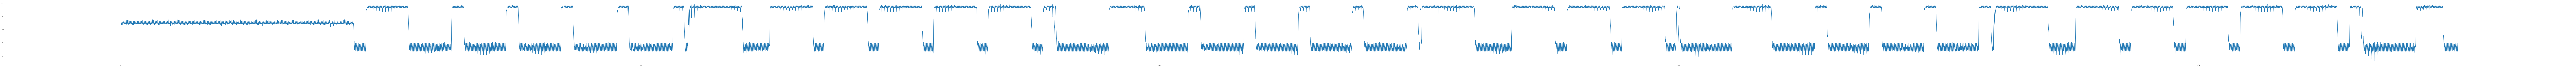

In [47]:
plt.rcParams["figure.figsize"] = [400,10]
plt.plot(neural.streams.PhD2.data[30000:75000])

In [48]:
neural.streams.PhD2

name:	'PhD2'
code:	np.uint32(843343952)
size:	np.uint32(138)
type:	np.uint32(33025)
type_str:	'streams'
ucf:	np.False_
fs:	np.float64(1017.2526245117188)
dform:	np.uint32(2)
start_time:	np.float64(0.0)
data:	array([  1,   3,   2, ..., 134, 135, 135], dtype=int16)
channel:	[1]

In [58]:
from scipy.signal import butter,lfilter,freqz
pd = neural.streams.PhD2.data
fs = neural.streams.PhD2.fs
cutoff_freq = 50
nyquist_freq = 0.5*fs
normal_cutoff = cutoff_freq/nyquist_freq
order = 4

b,a = butter(order,normal_cutoff,btype='low',analog=False)

pd_filt = lfilter(b,a,pd)





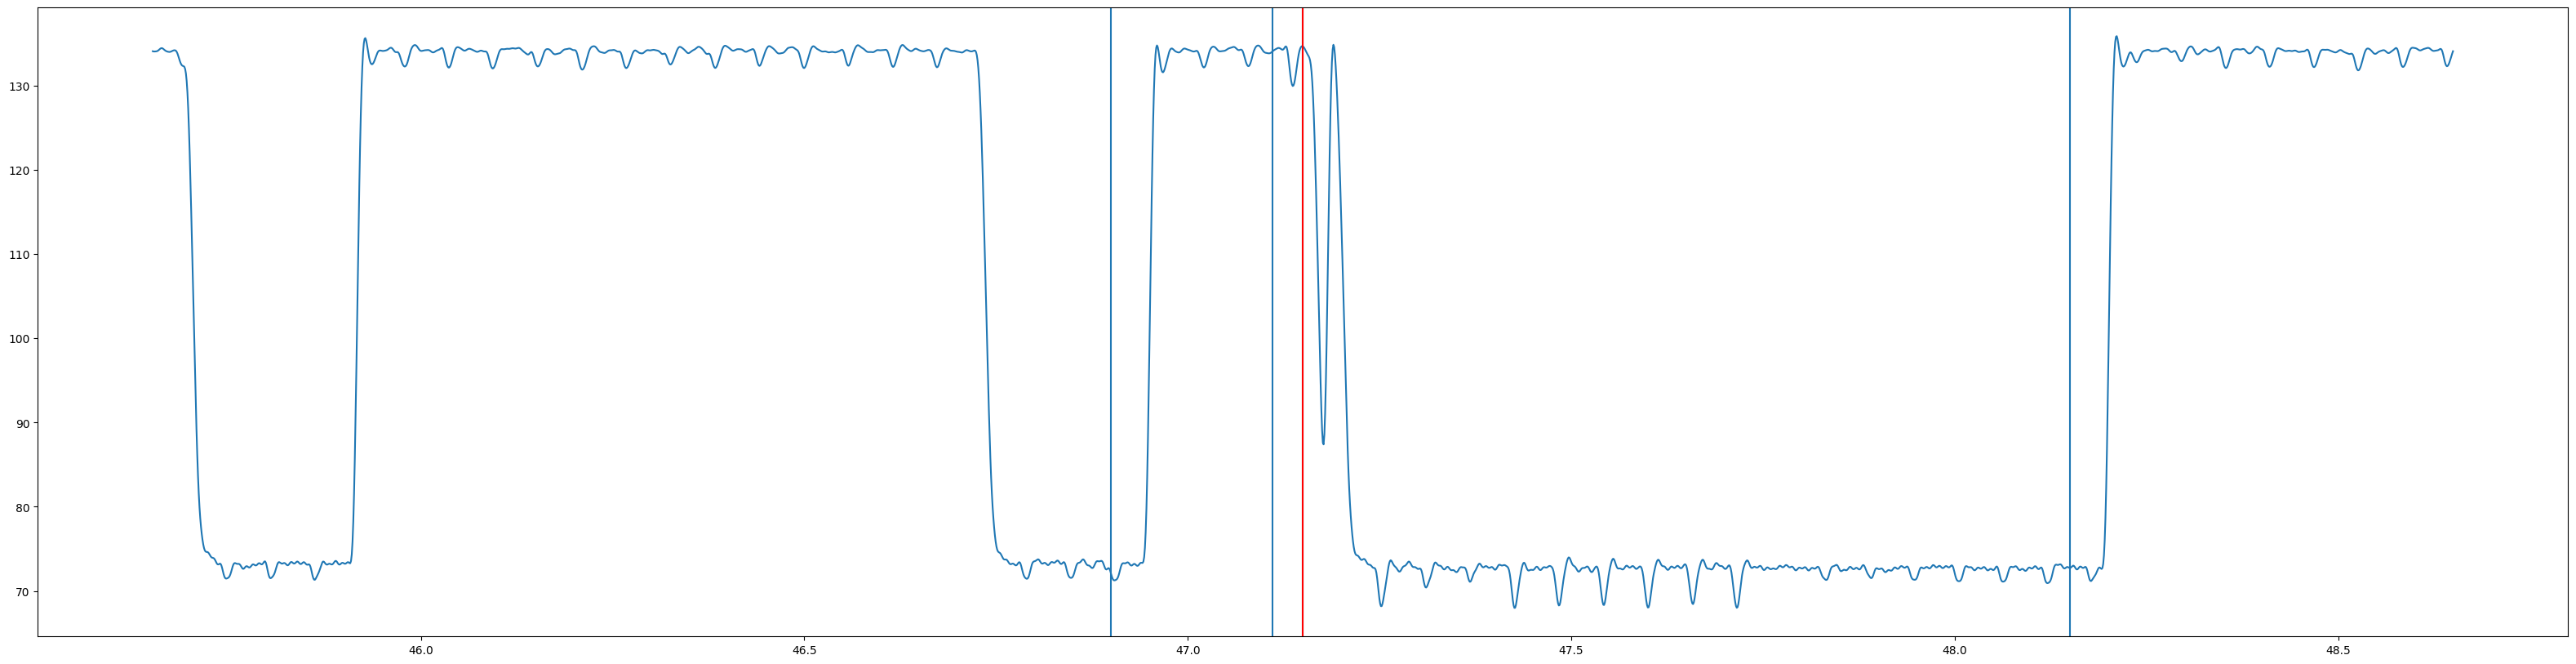

In [86]:
plt.rcParams["figure.figsize"] = [40,10]
fs = neural.streams.PhD2.fs
pd_times = np.array([(p,i/fs) for i,p in enumerate(pd_filt)])

times_plot = [46.9, 47.11, 47.15,48.15]

time_get = 47.15
window = 1.5
trange = (time_get-window,time_get+window)
mask = (pd_times[:,1] >= trange[0]) & (pd_times[:,1] <= trange[1])
pd_slice = pd_times[mask]
plt.plot(pd_slice[:,1], pd_slice[:,0])
for t in times_plot:
    plt.axvline(t)
plt.axvline(time_get, color = 'red')